# Introduccion

Este proyecto es acerca de una gran tienda en linea en la cual se han recopilado hipotesis que pueden ayudar a aumentar los ingresos, por lo que se hara un teste A/B y posteriormente se analizaran los resultados.

# Preprocesamiento de datos

In [1]:
#importacion de librerias

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from statsmodels.stats.proportion import proportions_ztest




In [2]:
#Importacion de base de datos

hipotesis = pd.read_csv('/datasets/hypotheses_us.csv')

orders = pd.read_csv('/datasets/orders_us.csv')

visits = pd.read_csv('/datasets/visits_us.csv')


In [3]:
hipotesis.info()

orders.info()

visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 1 columns):
 #   Column                                     Non-Null Count  Dtype 
---  ------                                     --------------  ----- 
 0   Hypothesis;Reach;Impact;Confidence;Effort  9 non-null      object
dtypes: object(1)
memory usage: 200.0+ bytes
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   transactionId  1197 non-null   int64  
 1   visitorId      1197 non-null   int64  
 2   date           1197 non-null   object 
 3   revenue        1197 non-null   float64
 4   group          1197 non-null   object 
dtypes: float64(1), int64(2), object(2)
memory usage: 46.9+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------

Se obtienen los tipos de datos de los tres datasets lo cuales de hipotesis con su respectivas metricas, de ordenes con el revenue y usuarios que se han tendio y el de visitas con sus respectivas fechas

In [4]:
display(hipotesis)
display(orders)
display(visits)

,Hypothesis;Reach;Impact;Confidence;Effort
0,Add two new channels for attracting traffic. T...
1,Launch your own delivery service. This will sh...
2,Add product recommendation blocks to the store...
3,Change the category structure. This will incre...
4,Change the background color on the main page. ...
5,Add a customer review page. This will increase...
6,Show banners with current offers and sales on ...
7,Add a subscription form to all the main pages....
8,Launch a promotion that gives users discounts ...


,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
2,2961555356,4069496402,2019-08-15,10.2,A
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B
...,...,...,...,...,...
1192,2662137336,3733762160,2019-08-14,100.8,B
1193,2203539145,370388673,2019-08-14,50.1,A
1194,1807773912,573423106,2019-08-14,165.3,A
1195,1947021204,1614305549,2019-08-14,5.5,A


,date,group,visits
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
...,...,...,...
57,2019-08-27,B,720
58,2019-08-28,B,654
59,2019-08-29,B,531
60,2019-08-30,B,490


In [5]:
#Se transforma a tipo fecha columnas d
orders['date'] = pd.to_datetime(orders['date'])
visits['date'] = pd.to_datetime(visits['date'])

orders.info()
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionId  1197 non-null   int64         
 1   visitorId      1197 non-null   int64         
 2   date           1197 non-null   datetime64[ns]
 3   revenue        1197 non-null   float64       
 4   group          1197 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 46.9+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    62 non-null     datetime64[ns]
 1   group   62 non-null     object        
 2   visits  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


In [6]:
hipotesis = pd.read_csv('/datasets/hypotheses_us.csv', ';')


                        
print(hipotesis.head())

                                          Hypothesis  Reach  Impact  \
0  Add two new channels for attracting traffic. T...      3      10   
1  Launch your own delivery service. This will sh...      2       5   
2  Add product recommendation blocks to the store...      8       3   
3  Change the category structure. This will incre...      8       3   
4  Change the background color on the main page. ...      3       1   

   Confidence  Effort  
0           8       6  
1           4      10  
2           7       3  
3           3       8  
4           1       1  


Al obtener la informacion general de cada dataset se puede ver que la primera son las hipotesis con sus respectivas metricas de essfuerzo, confiabilidad y alcance las cualees serviran para hacer un analisis mas profundo de que tan factibles son para impactar ene el negocio. 

Se obtiene el dataset de ordenes la cuales son un registro por fecha, transaccion, usuario y grupo, esta informacion es la que puede funcionar para nuestros analisis siguientes. De igual forma se el datasets orders en donde tenemos las visitas por grupo y fecha tambien ayudara mas a fondo en los tests

## Priorizar hipotesis

In [7]:
#Calculamos el ice
hipotesis['Ice'] = (hipotesis['Impact'] * hipotesis['Confidence']) / hipotesis['Effort']

hipotesis_ice = hipotesis.sort_values(by='Ice', ascending=False)

display(hipotesis_ice[['Hypothesis', 'Ice']])

,Hypothesis,Ice
8,Launch a promotion that gives users discounts ...,16.200000
0,Add two new channels for attracting traffic. T...,13.333333
7,Add a subscription form to all the main pages....,11.200000
6,Show banners with current offers and sales on ...,8.000000
2,Add product recommendation blocks to the store...,7.000000
1,Launch your own delivery service. This will sh...,2.000000
5,Add a customer review page. This will increase...,1.333333
3,Change the category structure. This will incre...,1.125000
4,Change the background color on the main page. ...,1.000000


In [8]:
#Calculamos RICE



hipotesis['Rice'] = (hipotesis['Reach'] * hipotesis['Impact'] * hipotesis['Confidence']) / hipotesis['Effort']

hipotesis_rice = hipotesis.sort_values(by='Rice', ascending=False)

display(hipotesis_rice[['Hypothesis', 'Rice']])

,Hypothesis,Rice
7,Add a subscription form to all the main pages....,112.0
2,Add product recommendation blocks to the store...,56.0
0,Add two new channels for attracting traffic. T...,40.0
6,Show banners with current offers and sales on ...,40.0
8,Launch a promotion that gives users discounts ...,16.2
3,Change the category structure. This will incre...,9.0
1,Launch your own delivery service. This will sh...,4.0
5,Add a customer review page. This will increase...,4.0
4,Change the background color on the main page. ...,3.0


Se puede ver un cambio de priorizacion cuando entre ICE y Rice, esto es debido a que en RICE tomamos en cuenta el parametro de alcance. 

Podemos ver que en ICE el top tres de prioridades son
-Lanzar una promocion de descuento en los cumpleanos.
-Anadir dos canales nuevos para atraer trafico
-Agregar una forma de suscripcion para las principales paginas. 

Mientras tanto en RICE el top tres son 
-Agregar una forma de suscripcion para las principales paginas. 
-Agregar bloques de recomendaciones de productos a la pagina de la tienda
-Anadir dos canales nuevos para atraer trafico y mostrar anuncios con ofertas actuales


Podriamos decir que las principales en ambas  son
-Anadir dos canales nuevos para atraer trafico
-Agregar una forma de suscripcion para las principales paginas. 



# Parte 2. Análisis de test A/B

In [9]:
#Se realiza filtrado de visitantes unicos por grupo
visitantes_unicos_a = orders[orders['group'] == 'A']['visitorId'].unique()
visitantes_ubicos_b = orders[orders['group'] == 'B']['visitorId'].unique()

visitas_a = set(visitantes_unicos_a)
visitas_b = set(visitantes_ubicos_b)

visitantes_ambos_grupos = visitas_a.intersection(visitas_b)

orders = orders[~orders['visitorId'].isin(visitantes_ambos_grupos)]



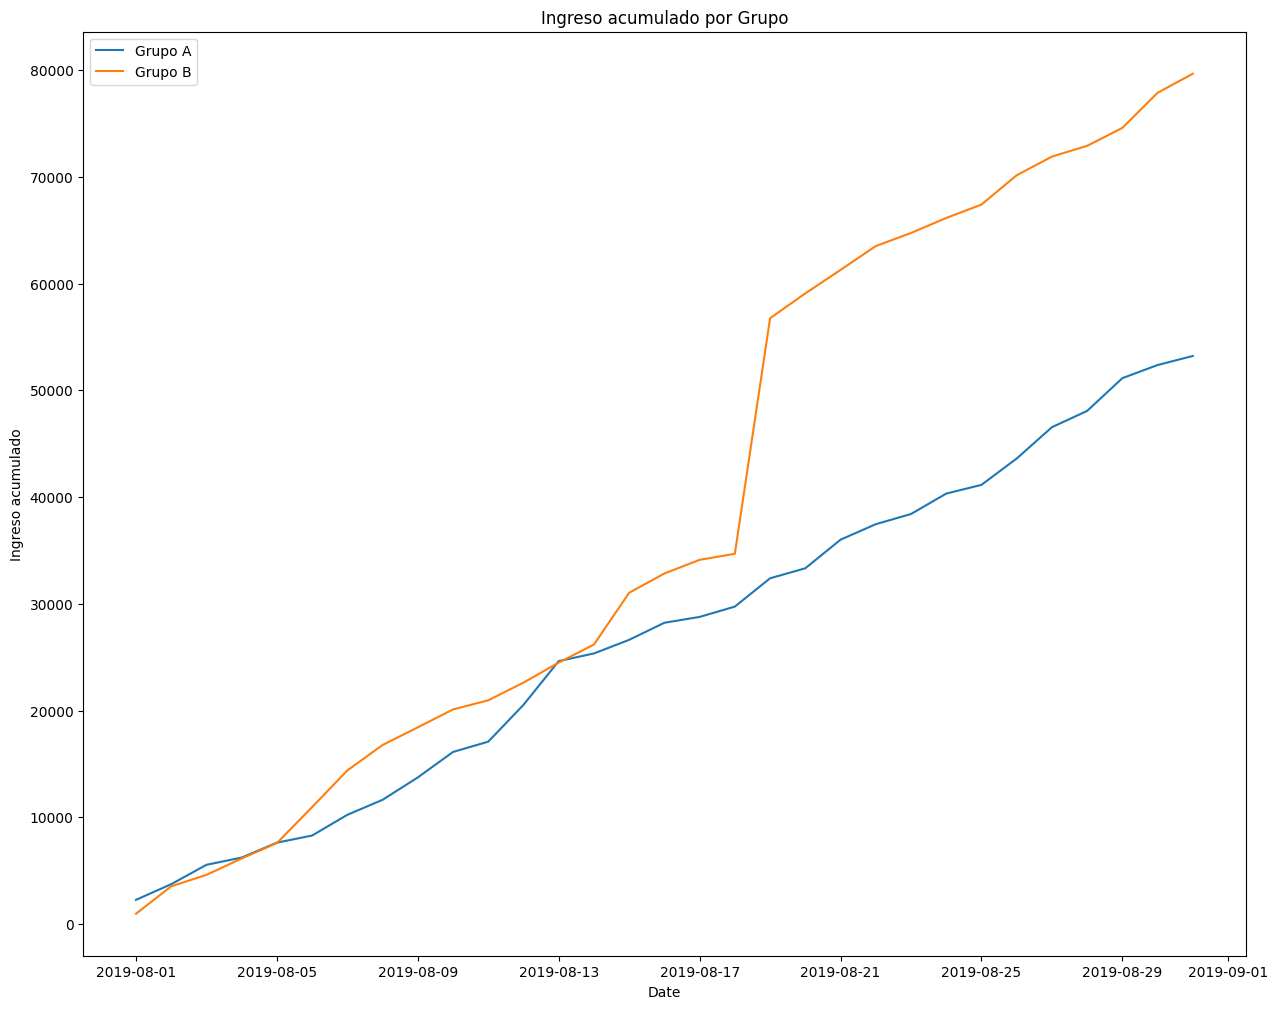

In [10]:
#Representación gráfica del ingreso acumulado por grupo.

ingresos_acumulado_a = orders[orders['group'] == 'A'].groupby('date').agg({'revenue': 'sum'}).cumsum()
ingresos_acumulado_b = orders[orders['group'] == 'B'].groupby('date').agg({'revenue': 'sum'}).cumsum()

plt.figure(figsize=(15, 12))
plt.plot(ingresos_acumulado_a, label='Grupo A')
plt.plot(ingresos_acumulado_b, label='Grupo B')
plt.title('Ingreso acumulado por Grupo')
plt.xlabel('Date')
plt.ylabel('Ingreso acumulado')
plt.legend()
plt.show()

Se puede que ver que hay un comportamiento similar entre las ganancias de grupo A y B, sin embargo a partir de agosto 17 es donde A supera a B significativamente en las ganancias

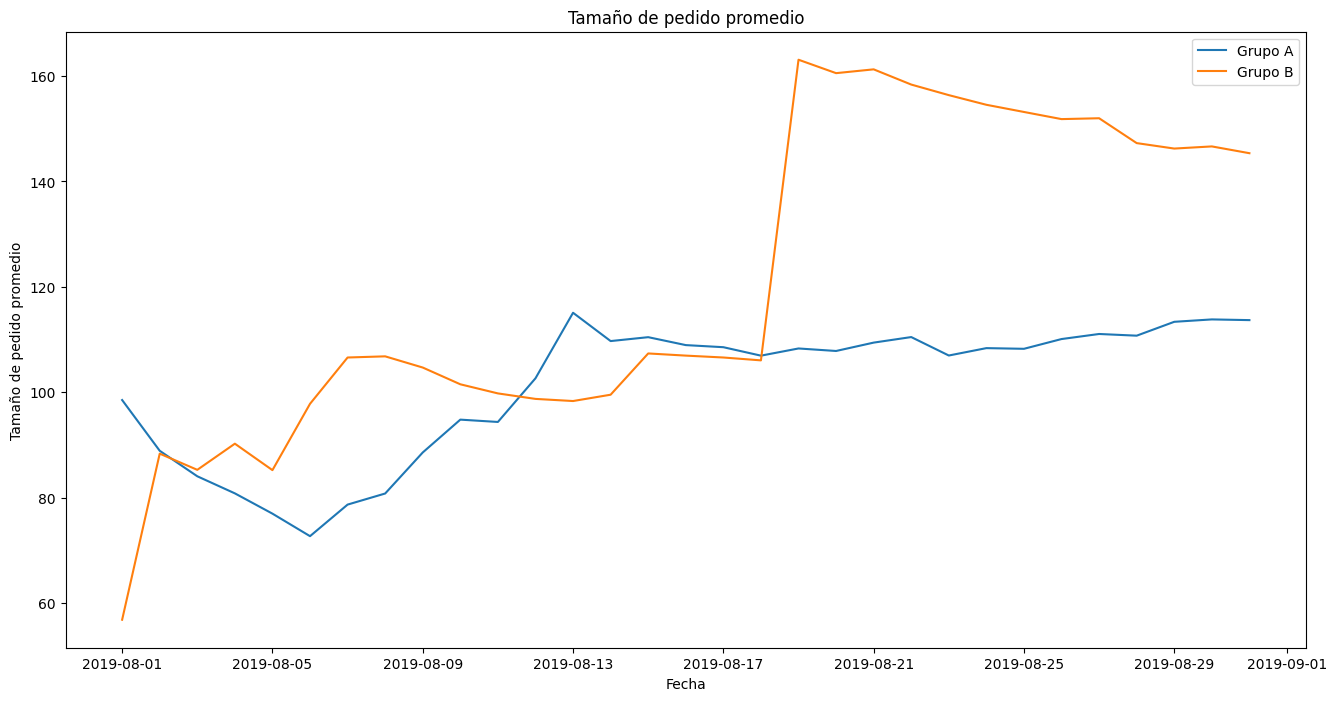

In [11]:
# Representación grafica tamaño pedido promedio por grupo

ordenes_acumuladas_a = orders[orders['group'] == 'A'].pivot_table(
    index='date',
    values=['transactionId', 'revenue'],
    aggfunc={'transactionId': 'count', 'revenue': 'sum'}
).cumsum().reset_index()

ordenes_acumuladas_b = orders[orders['group'] == 'B'].pivot_table(
    index='date',
    values=['transactionId', 'revenue'],
    aggfunc={'transactionId': 'count', 'revenue': 'sum'}
).cumsum().reset_index()


ordenes_acumuladas_a['tamano_promedio_orden'] = ordenes_acumuladas_a['revenue'] / ordenes_acumuladas_a['transactionId']
ordenes_acumuladas_b['tamano_promedio_orden'] = ordenes_acumuladas_b['revenue'] / ordenes_acumuladas_b['transactionId']





plt.figure(figsize=(16, 8))
plt.plot(ordenes_acumuladas_a['date'], ordenes_acumuladas_a['tamano_promedio_orden'], label='Grupo A')
plt.plot(ordenes_acumuladas_b['date'], ordenes_acumuladas_b['tamano_promedio_orden'], label='Grupo B')
plt.title('Tamaño de pedido promedio')
plt.xlabel('Fecha')
plt.ylabel('Tamaño de pedido promedio')
plt.legend()
plt.show()

Se puede ver que grupo a y b tienen un comportamiento similar hasta agosto 17, a partir de aqui se puede ver que el revenue por orden aumente significativamente en agosto para grupo b de 110 a 160 mientras que A se estanca en 110

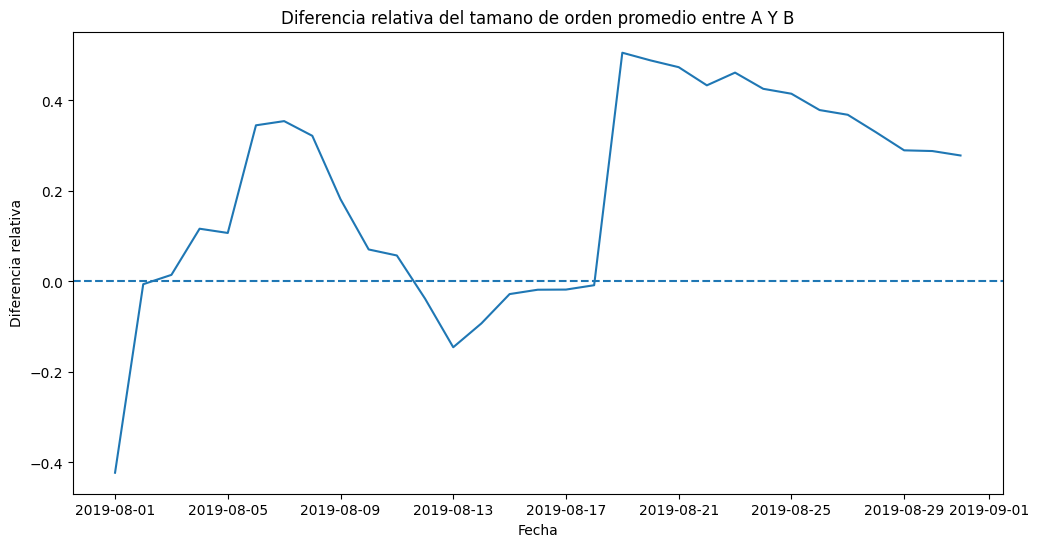

In [12]:

###  Representación gráfica de la diferencia relativa en el tamaño de pedido promedio acumulado para el grupo B en comparación con el grupo A.
merged_cumulative_orders = pd.merge(ordenes_acumuladas_a, ordenes_acumuladas_b, on='date', suffixes=['_A', '_B'])
merged_cumulative_orders['diferencia relativa de promedio'] = (
    (merged_cumulative_orders['tamano_promedio_orden_B'] - merged_cumulative_orders['tamano_promedio_orden_A']) /
    merged_cumulative_orders['tamano_promedio_orden_A']
)


plt.figure(figsize=(12, 6))
plt.plot(merged_cumulative_orders['date'], merged_cumulative_orders['diferencia relativa de promedio'])
plt.title('Diferencia relativa del tamano de orden promedio entre A Y B')
plt.xlabel('Fecha')
plt.ylabel('Diferencia relativa')
plt.axhline(y=0, linestyle='--')
plt.show()


   Se puede ver una diferencia diferencia relativa en los primeros dias del mes a excepcion del 08 de agosto que es donde
   no supera el 10%, esto tiene relacion con la grafica anterior del tamano promedio de pedido pues justo enesta fecha es 
   donde hay un cruce entre ambos grupos. Despues de ahi vuelve haber una diferencia entre ambos hasta del 50%

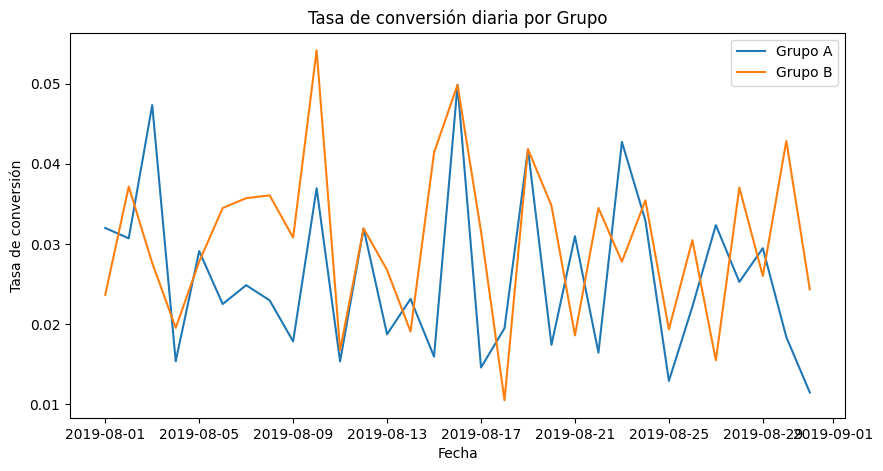

In [13]:
# Calculo de  la tasa de conversión de cada grupo como la relación entre los pedidos y el número de visitas de cada día.
ordenes_dia_a = orders[orders['group'] == 'A'].groupby('date')['transactionId'].count().reset_index()

ordenes_dia_b = orders[orders['group'] == 'B'].groupby('date')['transactionId'].count().reset_index()

ordenes_dia_a.columns = ['date', 'orders_a']
ordenes_dia_b.columns = ['date', 'orders_b']



vistas_a = visits[visits['group'] == 'A']
vistas_b = visits[visits['group'] == 'B']

merge_a = pd.merge(ordenes_dia_a, vistas_a, on='date')
merge_b = pd.merge(ordenes_dia_b, vistas_a, on='date')

merge_a['conversion_a'] = merge_a['orders_a']/merge_a['visits']
merge_b['conversion_b'] = merge_b['orders_b']/merge_b['visits']

plt.figure(figsize=(10, 5))
plt.plot(merge_a['date'], merge_a['conversion_a'], label='Grupo A')
plt.plot(merge_b['date'], merge_b['conversion_b'], label='Grupo B')
plt.title('Tasa de conversión diaria por Grupo')
plt.xlabel('Fecha')
plt.ylabel('Tasa de conversión')
plt.legend()
plt.show()

Se puede ver en la grafica que la tasa de conversion se comporta de una manera muy similar en ambos grupos, es decir que el porcentaje de éxito de orden por cada visita es muy similar cada día para ambos grupos

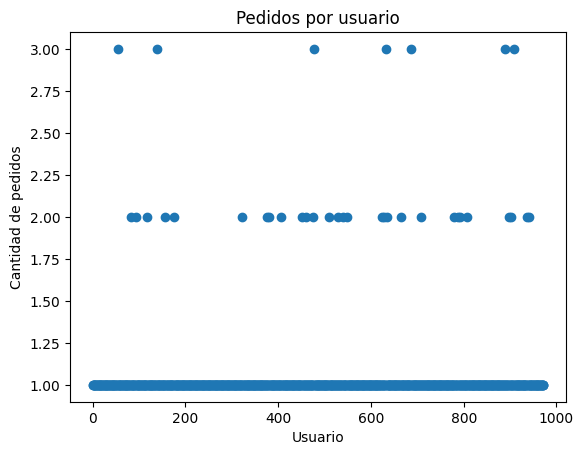

In [14]:
#Grafico dispersion entre de pedidos
pedidos_usuario = orders.groupby('visitorId')['transactionId'].count().reset_index()

pedidos_usuario.columns = ['visitorId', 'numero_ordenes']

plt.scatter(range(len(pedidos_usuario['visitorId'])), pedidos_usuario['numero_ordenes'])
plt.title('Pedidos por usuario')
plt.xlabel('Usuario')
plt.ylabel('Cantidad de pedidos')
plt.show()


In [15]:
#Calculo de percentiles 95 y 99 para el número de pedidos por usario
percentiles = pedidos_usuario['numero_ordenes'].quantile([.95, .99])

print(percentiles)



0.95    1.0
0.99    2.0
Name: numero_ordenes, dtype: float64


El grafico de dispersión nos dice que  la cantidad de pedidos que suele hacer cada usario es 1, esto mismo se puede confirmar cuando vemos cuantas ordenes representa cada percentil, vemos que a partir del percetnil 95 solo se sigue haciendo una ordene y a partir del percentil 99 se hacen 2 ordenes. Esto quiere decir que el 95% de los usuarios hace 1 orden

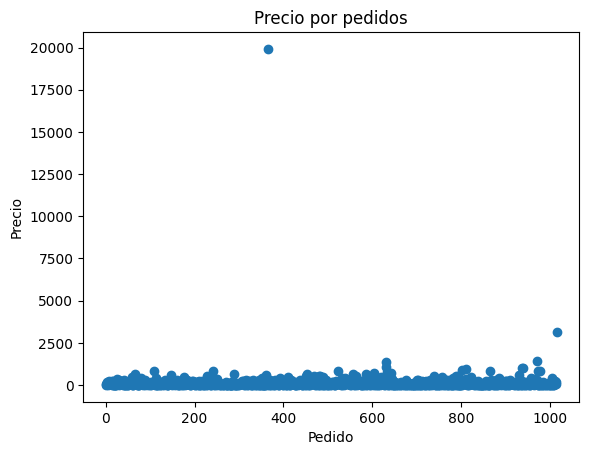

In [16]:
#Gráfico de dispersión de los precios de los pedidos.



plt.scatter(range(len(orders)), orders['revenue'])
plt.title('Precio por pedidos')
plt.xlabel('Pedido')
plt.ylabel('Precio')
plt.show()


Aqui vemos que el precio de los pedidos no suele superar ni siquiera los 1250, habiendo solo dos outliers

In [17]:
#Significancia estadistica de conversion entre los grupos

visitas_a = visits[visits['group'] == 'A']['visits'].sum()
visitas_b = visits[visits['group'] == 'B']['visits'].sum()



ordenes_a = orders[orders['group'] == 'A']['transactionId'].count()
ordenes_b = orders[orders['group'] == 'B']['transactionId'].count()



conversion_a = ordenes_a / visitas_a
conversion_b = ordenes_b / visitas_b


print(conversion_a)
print(conversion_b)


visitas = [visitas_a, visitas_b]
ordenes = [ordenes_a, ordenes_b]


z_stat, p_val = proportions_ztest(ordenes, visitas)

print("Estadístico Z:", z_stat)
print("Valor P:", p_val)


0.02497865072587532
0.02897018397124128
Estadístico Z: -2.3899344431697442
Valor P: 0.01685138043470311


Se hace un ztests para saber si hay diferencia significativa entre las proporciones de grupo a y b siendo la hipotesis nula HO:
conversion_a = conversion_b y h1:conversion_a=/=conversion_b.

Se oobtiene un p-value menor a .05 por lo que hay suficiente evidencia estadistica para rechazar H0, por lo que que se concluye
que las tasa de conversion_a es diferente a la tasa de conversion_b

In [18]:
#Significancoia estadistica de tamano de orden promedio entre los grupos
tamano_orden_a = orders[orders['group'] == 'A']['revenue'].mean()
tamano_orden_b = orders[orders['group'] == 'B']['revenue'].mean()

print('Tamano de orden promedio a:', tamano_orden_a )
print('Tamano de orden promedio b:', tamano_orden_b )



t_test, p_value = stats.ttest_ind(orders[orders['group'] == 'A']['revenue'], 
                                  orders[orders['group'] == 'B']['revenue'], equal_var=False)

print('valor p', p_value )

Tamano de orden promedio a: 113.70085470085469
Tamano de orden promedio b: 145.34890510948907
valor p 0.4043438730780975


Se hace ttest para comprobar la hipotesis nula H0: tamano_orden_a=tamano_orden_a. P value mayor a alpha de .05 por lo no hay suficiente evidencia estadistica para rechazar H0, es asi que Tamano de orden promedio a es igual a Tamano de orden promedio b

# Conclusiones

Primeramente, se tiene que las ganancia total o acumulada en el mes por grupo tienden a ser similares, sin embargo, a mitad del mes grupo b se ve superado por grupo a, también podemos ver que justamente también a mitad del mes la ganancia promedio por medido es mayor en grupo b, a su vez podemos decir que hay diferencia del tamaño de la orden hasta por lo menos del 20% la mayoría del mes.
Si hablamos de la conversión de ordenes/visitas entre los grupos podremos decir que hay una diferencia significativa entre grupo a y b, siendo el b el cual tiene una mejor conversión. 
Por otro lado, podemos decir que la diferencia de tamaño promedio por orden o ganancia por orden entre los grupos no es significativamente diferente.

En resumen

-Es más probable que tengamos mejor probabilidad de éxito(ordenes) por cada visita de grupo b en comparación a grupo A

-No hay diferencia significativa entre las ganancias promedio por cada pedido entre grupo a y grupo b

Dado eso podríamos decidir parar la prueba y considerar el grupo b como líder ya que si bien no hay diferencia significativa entre las ganancias por pedido,  el hecho de tener una mejor tasa de conversión para b(una mejor probabilidad de tener ordenes) puede compensar el primer punto y obtener ganancias significativas invirtiendo los esfuerzos en grupo b.
